In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame({
    "name": [
        "naive neural network",
        "naive neural network",
        "naive LSTM",
        "naive LSTM",
        "context LSTM",
        "context LSTM",
        "LSTM + Power",
        "LSTM + Power",
        "Context LSTM + Power",
        "Context LSTM + Power",
        "Context GRU",
        "Context GRU",
        "Bi-Directional Context LSTM",
        "Bi-Directional Context LSTM",
        "Bi-Directional Context GRU",
        "Bi-Directional Context GRU",
        "Bi-Directional LSTM + CNN",
        "Bi-Directional LSTM + CNN",
        "Context Bi-LSTM + BPE",
        "Context Bi-LSTM + BPE",
        "Bi-LSTM + SpaCy",
        "Bi-LSTM + SpaCy",
        "Bi-Context LSTM + Power",
        "Bi-Context LSTM + Power",
    ],
    "who": [
        "sender", "receiver",
        "sender", "receiver",
        "sender", "receiver",
        "sender", "receiver",
        "sender", "receiver",
        "sender", "receiver",
        "sender", "receiver",
        "sender", "receiver",
        "sender", "receiver",
        "sender", "receiver",
        "sender", "receiver",
        "sender", "receiver",
    ],
    "f1-true": [
        0.94, 0.94,
        0.93, 0.94,
        0.93, 0.94,
        0.96, 0.96,
        0.92, 0.95,
        0.95, 0.93,
        0.91, 0.93,
        0.94, 0.95,
        0.93, 0.92,
        0.94, 0.95,
        0.90, 0.95,
        0.94, 0.93,
    ],
    "f1-false": [
        0.16, 0.13,
        0.12, 0.08,
        0.21, 0.19,
        0.00, 0.07,
        0.20, 0.14,
        0.18, 0.15,
        0.22, 0.16,
        0.17, 0.13,
        0.23, 0.16,
        0.21, 0.12,
        0.16, 0.12,
        0.21, 0.17,
    ],
    "f1-macro-average": [
        0.54, 0.54,
        0.53, 0.51,
        0.57, 0.57,
        0.48, 0.51,
        0.56, 0.54,
        0.56, 0.54,
        0.57, 0.55,
        0.55, 0.54,
        0.58, 0.54,
        0.58, 0.53,
        0.53, 0.53,
        0.58, 0.55,
    ]
})

df

,name,who,f1-true,f1-false,f1-macro-average
0,naive neural network,sender,0.94,0.16,0.54
1,naive neural network,receiver,0.94,0.13,0.54
2,naive LSTM,sender,0.93,0.12,0.53
3,naive LSTM,receiver,0.94,0.08,0.51
4,context LSTM,sender,0.93,0.21,0.57
5,context LSTM,receiver,0.94,0.19,0.57
6,LSTM + Power,sender,0.96,0.00,0.48
7,LSTM + Power,receiver,0.96,0.07,0.51
8,Context LSTM + Power,sender,0.92,0.20,0.56
9,Context LSTM + Power,receiver,0.95,0.14,0.54


In [20]:
def barh_graph(df, title_add = "", figsize=(5,5)):
    _, ax = plt.subplots(nrows=3, ncols=2, figsize=figsize)
    plt.subplots_adjust(wspace=0.06, hspace=0.05)
    plt.suptitle(f"{title_add} f1-scores")
    for (i,who) in enumerate(["sender", "receiver"]):
        ax[0][i].set_title(who.capitalize())
        for (j,what) in enumerate(["true", "false", "macro-average"]):
            ax[j][i].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
            ax[j][i].set_xticklabels([0, 0.2, 0.4, 0.6, 0.8, 1])
            if i > 0:
                ax[j][i].get_yaxis().set_visible(False)
                ax[j][i].annotate(what.capitalize(), xy=(1.0,6.1), ha="left", va="center", rotation=-90)
            if j < 2:
                ax[j][i].get_xaxis().set_visible(False)

            df_temp = df[df["who"] == who].sort_index(ascending=False).set_index("name")[f"f1-{what}"]
            ax[j][i].barh(df_temp.index, df_temp)
            ax[j][i].set_xlim([0.0, 1.0])
            for (y,v) in enumerate(df_temp):
                ax[j][i].text(v + (0.01 * (-1 if j != 1 else 1)), y, f"{v:.2f}", ha=("right" if j != 1 else "left"), va="center", color=("white" if j != 1 else "black"))
    plt.show()

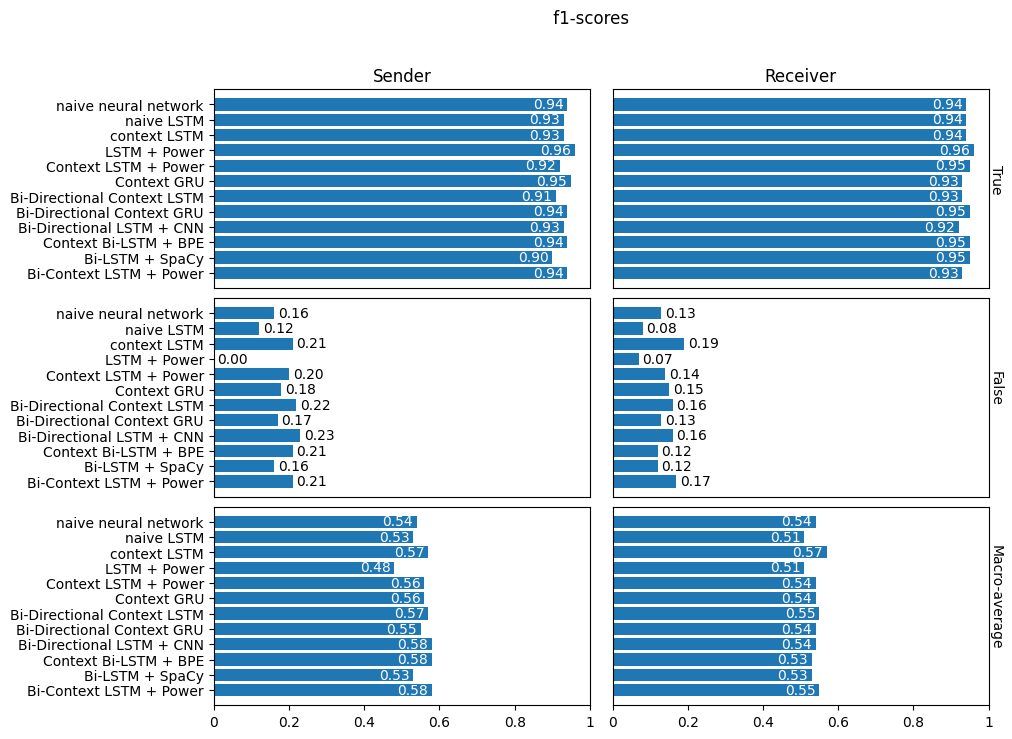

In [32]:
barh_graph(
    df,
    figsize=(10,8)
)

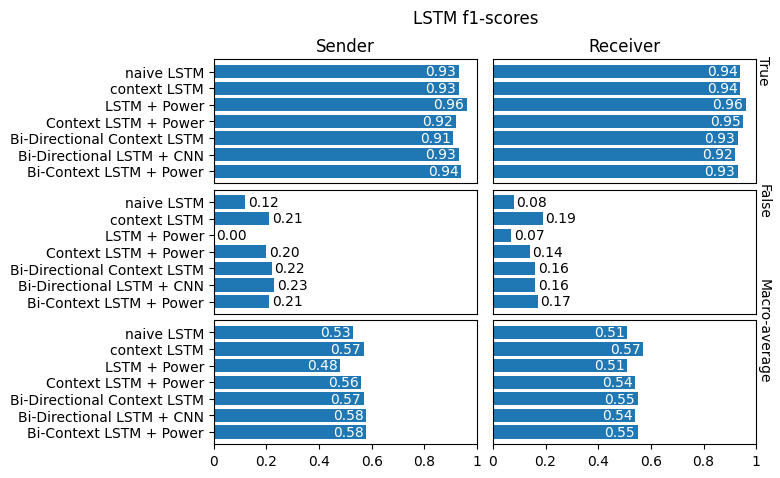

In [27]:
barh_graph(
    df[df["name"].str.contains("LSTM") & ~df["name"].str.contains("BPE") & ~df["name"].str.contains("SpaCy")],
    title_add="LSTM",
    figsize=(7,5)
)

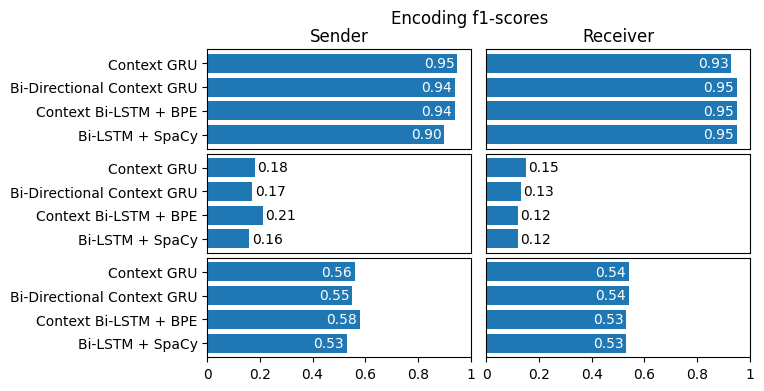

In [25]:
barh_graph(
    df[df["name"].str.contains("BPE") | df["name"].str.contains("SpaCy") | df["name"].str.contains("GRU")],
    title_add = "Encoding",
    figsize=(7,4)
)